## 1. 데이터의 확인과 실행

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1) # 데이터 전체를 랜덤하게 섞는다.
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [6]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 200)

Epoch 1/200
6497/6497 [==============================] - 0s 21us/step - loss: 3.5323 - accuracy: 0.2461
Epoch 2/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.4326 - accuracy: 0.8110
Epoch 3/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.2418 - accuracy: 0.9257
Epoch 4/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.2142 - accuracy: 0.9300
Epoch 5/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.2040 - accuracy: 0.9307
Epoch 6/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1985 - accuracy: 0.9314
Epoch 7/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1940 - accuracy: 0.9321
Epoch 8/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1891 - accuracy: 0.9324
Epoch 9/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1867 - accuracy: 0.9327
Epoch 10/200
6497/6497 [==============================] - 0s 4us/step - 

6497/6497 [==============================] - 0s 4us/step - loss: 0.0592 - accuracy: 0.9814
Epoch 79/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0612 - accuracy: 0.9825
Epoch 80/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0592 - accuracy: 0.9825
Epoch 81/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0601 - accuracy: 0.9823
Epoch 82/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0620 - accuracy: 0.9818
Epoch 83/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0567 - accuracy: 0.9831
Epoch 84/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0563 - accuracy: 0.9843
Epoch 85/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0561 - accuracy: 0.9831
Epoch 86/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0572 - accuracy: 0.9834
Epoch 87/200
6497/6497 [==============================] - 0s 4us/step - loss:

Epoch 155/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0536 - accuracy: 0.9845
Epoch 156/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0517 - accuracy: 0.9848
Epoch 157/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0547 - accuracy: 0.9837
Epoch 158/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0508 - accuracy: 0.9851
Epoch 159/200
6497/6497 [==============================] - 0s 5us/step - loss: 0.0497 - accuracy: 0.9857
Epoch 160/200
6497/6497 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.98 - 0s 4us/step - loss: 0.0616 - accuracy: 0.9797
Epoch 161/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0487 - accuracy: 0.9863
Epoch 162/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0497 - accuracy: 0.9858
Epoch 163/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0492 - accuracy: 0.9855
Epoch 164/200

In [9]:
# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 9us/step

 Accuracy: 0.9858


## 2. 모델 업데이트하기

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [11]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [12]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [13]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [16]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:03d}-{val_loss:.4f}.hdf5' # 순서 번호 대신 keyword로 지정할 수 있음
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1)

In [18]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, callbacks = [checkpointer])

Train on 5197 samples, validate on 1300 samples
Epoch 1/200
5197/5197 [==============================] - 0s 6us/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0492 - val_accuracy: 0.9869

Epoch 00001: saving model to ./model/001-0.0492.hdf5
Epoch 2/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0503 - val_accuracy: 0.9869

Epoch 00002: saving model to ./model/002-0.0503.hdf5
Epoch 3/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0487 - accuracy: 0.9871 - val_loss: 0.0550 - val_accuracy: 0.9823

Epoch 00003: saving model to ./model/003-0.0550.hdf5
Epoch 4/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0500 - accuracy: 0.9863 - val_loss: 0.0496 - val_accuracy: 0.9892

Epoch 00004: saving model to ./model/004-0.0496.hdf5
Epoch 5/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0502 - accuracy: 0.9858 - val_loss: 0.0690 - val_accuracy: 0.9762

Epoch 0000

5197/5197 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.98 - 0s 5us/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0555 - val_accuracy: 0.9823

Epoch 00042: saving model to ./model/042-0.0555.hdf5
Epoch 43/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9769

Epoch 00043: saving model to ./model/043-0.0678.hdf5
Epoch 44/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0522 - accuracy: 0.9852 - val_loss: 0.0480 - val_accuracy: 0.9869

Epoch 00044: saving model to ./model/044-0.0480.hdf5
Epoch 45/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0651 - val_accuracy: 0.9785

Epoch 00045: saving model to ./model/045-0.0651.hdf5
Epoch 46/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0516 - accuracy: 0.9856 - val_loss: 0.0556 - val_accuracy: 0.9815

Epoch 00046: saving mode

5197/5197 [==============================] - 0s 5us/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0483 - val_accuracy: 0.9862

Epoch 00082: saving model to ./model/082-0.0483.hdf5
Epoch 83/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0517 - val_accuracy: 0.9831

Epoch 00083: saving model to ./model/083-0.0517.hdf5
Epoch 84/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0482 - accuracy: 0.9871 - val_loss: 0.0497 - val_accuracy: 0.9831

Epoch 00084: saving model to ./model/084-0.0497.hdf5
Epoch 85/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0468 - accuracy: 0.9871 - val_loss: 0.0474 - val_accuracy: 0.9869

Epoch 00085: saving model to ./model/085-0.0474.hdf5
Epoch 86/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.0484 - val_accuracy: 0.9854

Epoch 00086: saving model to ./model/086-0.0484.hdf5
Epoch 87/200


5197/5197 [==============================] - 0s 5us/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0509 - val_accuracy: 0.9885

Epoch 00122: saving model to ./model/122-0.0509.hdf5
Epoch 123/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0552 - val_accuracy: 0.9838

Epoch 00123: saving model to ./model/123-0.0552.hdf5
Epoch 124/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0495 - accuracy: 0.9856 - val_loss: 0.0535 - val_accuracy: 0.9831

Epoch 00124: saving model to ./model/124-0.0535.hdf5
Epoch 125/200
5197/5197 [==============================] - 0s 4us/step - loss: 0.0480 - accuracy: 0.9869 - val_loss: 0.0474 - val_accuracy: 0.9869

Epoch 00125: saving model to ./model/125-0.0474.hdf5
Epoch 126/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0473 - val_accuracy: 0.9885

Epoch 00126: saving model to ./model/126-0.0473.hdf5
Epoch 127

5197/5197 [==============================] - 0s 5us/step - loss: 0.0465 - accuracy: 0.9875 - val_loss: 0.0480 - val_accuracy: 0.9869

Epoch 00162: saving model to ./model/162-0.0480.hdf5
Epoch 163/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0465 - accuracy: 0.9871 - val_loss: 0.0477 - val_accuracy: 0.9869

Epoch 00163: saving model to ./model/163-0.0477.hdf5
Epoch 164/200
5197/5197 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - 0s 5us/step - loss: 0.0474 - accuracy: 0.9873 - val_loss: 0.0490 - val_accuracy: 0.9831

Epoch 00164: saving model to ./model/164-0.0490.hdf5
Epoch 165/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0486 - accuracy: 0.9867 - val_loss: 0.0506 - val_accuracy: 0.9892

Epoch 00165: saving model to ./model/165-0.0506.hdf5
Epoch 166/200
5197/5197 [==============================] - 0s 5us/step - loss: 0.0478 - accuracy: 0.9879 - val_loss: 0.0530 - val_accuracy: 0.9892

Epoch 00166: saving 

## 3. 그래프로 확인하기

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [37]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [38]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [41]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:04d}-{val_loss:.4f}.hdf5' # 순서 번호 대신 keyword로 지정할 수 있음
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

In [42]:
# 모델 실행 및 저장
history =  model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500,
                     verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.90717, saving model to ./model/0001-0.9072.hdf5

Epoch 00002: val_loss improved from 0.90717 to 0.76760, saving model to ./model/0002-0.7676.hdf5

Epoch 00003: val_loss improved from 0.76760 to 0.65296, saving model to ./model/0003-0.6530.hdf5

Epoch 00004: val_loss improved from 0.65296 to 0.55835, saving model to ./model/0004-0.5584.hdf5

Epoch 00005: val_loss improved from 0.55835 to 0.48119, saving model to ./model/0005-0.4812.hdf5

Epoch 00006: val_loss improved from 0.48119 to 0.42378, saving model to ./model/0006-0.4238.hdf5

Epoch 00007: val_loss improved from 0.42378 to 0.39505, saving model to ./model/0007-0.3950.hdf5

Epoch 00008: val_loss did not improve from 0.39505

Epoch 00009: val_loss did not improve from 0.39505

Epoch 00010: val_loss did not improve from 0.39505

Epoch 00011: val_loss did not improve from 0.39505

Epoch 00012: val_loss improved from 0.39505 to 0.39003, saving model to ./model/0012-0.3900.hdf5

Epoch 00013


Epoch 00098: val_loss improved from 0.21415 to 0.21208, saving model to ./model/0098-0.2121.hdf5

Epoch 00099: val_loss improved from 0.21208 to 0.21164, saving model to ./model/0099-0.2116.hdf5

Epoch 00100: val_loss did not improve from 0.21164

Epoch 00101: val_loss improved from 0.21164 to 0.21090, saving model to ./model/0101-0.2109.hdf5

Epoch 00102: val_loss improved from 0.21090 to 0.20975, saving model to ./model/0102-0.2098.hdf5

Epoch 00103: val_loss improved from 0.20975 to 0.20780, saving model to ./model/0103-0.2078.hdf5

Epoch 00104: val_loss improved from 0.20780 to 0.20677, saving model to ./model/0104-0.2068.hdf5

Epoch 00105: val_loss improved from 0.20677 to 0.20666, saving model to ./model/0105-0.2067.hdf5

Epoch 00106: val_loss did not improve from 0.20666

Epoch 00107: val_loss did not improve from 0.20666

Epoch 00108: val_loss did not improve from 0.20666

Epoch 00109: val_loss improved from 0.20666 to 0.20495, saving model to ./model/0109-0.2049.hdf5

Epoch 0


Epoch 00236: val_loss did not improve from 0.14852

Epoch 00237: val_loss did not improve from 0.14852

Epoch 00238: val_loss did not improve from 0.14852

Epoch 00239: val_loss did not improve from 0.14852

Epoch 00240: val_loss did not improve from 0.14852

Epoch 00241: val_loss improved from 0.14852 to 0.14686, saving model to ./model/0241-0.1469.hdf5

Epoch 00242: val_loss improved from 0.14686 to 0.14667, saving model to ./model/0242-0.1467.hdf5

Epoch 00243: val_loss did not improve from 0.14667

Epoch 00244: val_loss did not improve from 0.14667

Epoch 00245: val_loss did not improve from 0.14667

Epoch 00246: val_loss did not improve from 0.14667

Epoch 00247: val_loss did not improve from 0.14667

Epoch 00248: val_loss improved from 0.14667 to 0.14606, saving model to ./model/0248-0.1461.hdf5

Epoch 00249: val_loss improved from 0.14606 to 0.14561, saving model to ./model/0249-0.1456.hdf5

Epoch 00250: val_loss did not improve from 0.14561

Epoch 00251: val_loss did not impro

Epoch 00378: val_loss improved from 0.12014 to 0.11994, saving model to ./model/0378-0.1199.hdf5

Epoch 00379: val_loss did not improve from 0.11994

Epoch 00380: val_loss did not improve from 0.11994

Epoch 00381: val_loss did not improve from 0.11994

Epoch 00382: val_loss did not improve from 0.11994

Epoch 00383: val_loss did not improve from 0.11994

Epoch 00384: val_loss did not improve from 0.11994

Epoch 00385: val_loss did not improve from 0.11994

Epoch 00386: val_loss did not improve from 0.11994

Epoch 00387: val_loss did not improve from 0.11994

Epoch 00388: val_loss did not improve from 0.11994

Epoch 00389: val_loss did not improve from 0.11994

Epoch 00390: val_loss did not improve from 0.11994

Epoch 00391: val_loss did not improve from 0.11994

Epoch 00392: val_loss improved from 0.11994 to 0.11900, saving model to ./model/0392-0.1190.hdf5

Epoch 00393: val_loss did not improve from 0.11900

Epoch 00394: val_loss did not improve from 0.11900

Epoch 00395: val_loss di

Epoch 00516: val_loss did not improve from 0.10534

Epoch 00517: val_loss did not improve from 0.10534

Epoch 00518: val_loss did not improve from 0.10534

Epoch 00519: val_loss did not improve from 0.10534

Epoch 00520: val_loss did not improve from 0.10534

Epoch 00521: val_loss did not improve from 0.10534

Epoch 00522: val_loss did not improve from 0.10534

Epoch 00523: val_loss did not improve from 0.10534

Epoch 00524: val_loss did not improve from 0.10534

Epoch 00525: val_loss did not improve from 0.10534

Epoch 00526: val_loss did not improve from 0.10534

Epoch 00527: val_loss did not improve from 0.10534

Epoch 00528: val_loss did not improve from 0.10534

Epoch 00529: val_loss improved from 0.10534 to 0.10483, saving model to ./model/0529-0.1048.hdf5

Epoch 00530: val_loss did not improve from 0.10483

Epoch 00531: val_loss did not improve from 0.10483

Epoch 00532: val_loss did not improve from 0.10483

Epoch 00533: val_loss improved from 0.10483 to 0.10445, saving model t


Epoch 00664: val_loss did not improve from 0.08939

Epoch 00665: val_loss did not improve from 0.08939

Epoch 00666: val_loss improved from 0.08939 to 0.08928, saving model to ./model/0666-0.0893.hdf5

Epoch 00667: val_loss did not improve from 0.08928

Epoch 00668: val_loss did not improve from 0.08928

Epoch 00669: val_loss improved from 0.08928 to 0.08815, saving model to ./model/0669-0.0882.hdf5

Epoch 00670: val_loss improved from 0.08815 to 0.08778, saving model to ./model/0670-0.0878.hdf5

Epoch 00671: val_loss did not improve from 0.08778

Epoch 00672: val_loss did not improve from 0.08778

Epoch 00673: val_loss did not improve from 0.08778

Epoch 00674: val_loss did not improve from 0.08778

Epoch 00675: val_loss did not improve from 0.08778

Epoch 00676: val_loss improved from 0.08778 to 0.08719, saving model to ./model/0676-0.0872.hdf5

Epoch 00677: val_loss did not improve from 0.08719

Epoch 00678: val_loss did not improve from 0.08719

Epoch 00679: val_loss did not impro

Epoch 00849: val_loss did not improve from 0.07959

Epoch 00850: val_loss did not improve from 0.07959

Epoch 00851: val_loss did not improve from 0.07959

Epoch 00852: val_loss did not improve from 0.07959

Epoch 00853: val_loss did not improve from 0.07959

Epoch 00854: val_loss did not improve from 0.07959

Epoch 00855: val_loss did not improve from 0.07959

Epoch 00856: val_loss did not improve from 0.07959

Epoch 00857: val_loss did not improve from 0.07959

Epoch 00858: val_loss did not improve from 0.07959

Epoch 00859: val_loss did not improve from 0.07959

Epoch 00860: val_loss did not improve from 0.07959

Epoch 00861: val_loss did not improve from 0.07959

Epoch 00862: val_loss did not improve from 0.07959

Epoch 00863: val_loss did not improve from 0.07959

Epoch 00864: val_loss did not improve from 0.07959

Epoch 00865: val_loss did not improve from 0.07959

Epoch 00866: val_loss did not improve from 0.07959

Epoch 00867: val_loss did not improve from 0.07959

Epoch 00868:


Epoch 01067: val_loss did not improve from 0.07959

Epoch 01068: val_loss did not improve from 0.07959

Epoch 01069: val_loss did not improve from 0.07959

Epoch 01070: val_loss did not improve from 0.07959

Epoch 01071: val_loss did not improve from 0.07959

Epoch 01072: val_loss did not improve from 0.07959

Epoch 01073: val_loss did not improve from 0.07959

Epoch 01074: val_loss did not improve from 0.07959

Epoch 01075: val_loss did not improve from 0.07959

Epoch 01076: val_loss did not improve from 0.07959

Epoch 01077: val_loss did not improve from 0.07959

Epoch 01078: val_loss did not improve from 0.07959

Epoch 01079: val_loss did not improve from 0.07959

Epoch 01080: val_loss did not improve from 0.07959

Epoch 01081: val_loss did not improve from 0.07959

Epoch 01082: val_loss did not improve from 0.07959

Epoch 01083: val_loss did not improve from 0.07959

Epoch 01084: val_loss did not improve from 0.07959

Epoch 01085: val_loss did not improve from 0.07959

Epoch 01086

Epoch 01286: val_loss did not improve from 0.07959

Epoch 01287: val_loss did not improve from 0.07959

Epoch 01288: val_loss did not improve from 0.07959

Epoch 01289: val_loss did not improve from 0.07959

Epoch 01290: val_loss did not improve from 0.07959

Epoch 01291: val_loss did not improve from 0.07959

Epoch 01292: val_loss did not improve from 0.07959

Epoch 01293: val_loss did not improve from 0.07959

Epoch 01294: val_loss did not improve from 0.07959

Epoch 01295: val_loss did not improve from 0.07959

Epoch 01296: val_loss did not improve from 0.07959

Epoch 01297: val_loss did not improve from 0.07959

Epoch 01298: val_loss did not improve from 0.07959

Epoch 01299: val_loss did not improve from 0.07959

Epoch 01300: val_loss did not improve from 0.07959

Epoch 01301: val_loss did not improve from 0.07959

Epoch 01302: val_loss did not improve from 0.07959

Epoch 01303: val_loss did not improve from 0.07959

Epoch 01304: val_loss did not improve from 0.07959

Epoch 01305:


Epoch 01497: val_loss did not improve from 0.07959

Epoch 01498: val_loss did not improve from 0.07959

Epoch 01499: val_loss did not improve from 0.07959

Epoch 01500: val_loss did not improve from 0.07959

Epoch 01501: val_loss did not improve from 0.07959

Epoch 01502: val_loss did not improve from 0.07959

Epoch 01503: val_loss did not improve from 0.07959

Epoch 01504: val_loss did not improve from 0.07959

Epoch 01505: val_loss did not improve from 0.07959

Epoch 01506: val_loss did not improve from 0.07959

Epoch 01507: val_loss did not improve from 0.07959

Epoch 01508: val_loss did not improve from 0.07959

Epoch 01509: val_loss did not improve from 0.07959

Epoch 01510: val_loss did not improve from 0.07959

Epoch 01511: val_loss did not improve from 0.07959

Epoch 01512: val_loss did not improve from 0.07959

Epoch 01513: val_loss did not improve from 0.07959

Epoch 01514: val_loss did not improve from 0.07959

Epoch 01515: val_loss did not improve from 0.07959

Epoch 01516

Epoch 01709: val_loss did not improve from 0.07959

Epoch 01710: val_loss did not improve from 0.07959

Epoch 01711: val_loss did not improve from 0.07959

Epoch 01712: val_loss did not improve from 0.07959

Epoch 01713: val_loss did not improve from 0.07959

Epoch 01714: val_loss did not improve from 0.07959

Epoch 01715: val_loss did not improve from 0.07959

Epoch 01716: val_loss did not improve from 0.07959

Epoch 01717: val_loss did not improve from 0.07959

Epoch 01718: val_loss did not improve from 0.07959

Epoch 01719: val_loss did not improve from 0.07959

Epoch 01720: val_loss did not improve from 0.07959

Epoch 01721: val_loss did not improve from 0.07959

Epoch 01722: val_loss did not improve from 0.07959

Epoch 01723: val_loss did not improve from 0.07959

Epoch 01724: val_loss did not improve from 0.07959

Epoch 01725: val_loss did not improve from 0.07959

Epoch 01726: val_loss did not improve from 0.07959

Epoch 01727: val_loss did not improve from 0.07959

Epoch 01728:

Epoch 01921: val_loss did not improve from 0.07959

Epoch 01922: val_loss did not improve from 0.07959

Epoch 01923: val_loss did not improve from 0.07959

Epoch 01924: val_loss did not improve from 0.07959

Epoch 01925: val_loss did not improve from 0.07959

Epoch 01926: val_loss did not improve from 0.07959

Epoch 01927: val_loss did not improve from 0.07959

Epoch 01928: val_loss did not improve from 0.07959

Epoch 01929: val_loss did not improve from 0.07959

Epoch 01930: val_loss did not improve from 0.07959

Epoch 01931: val_loss did not improve from 0.07959

Epoch 01932: val_loss did not improve from 0.07959

Epoch 01933: val_loss did not improve from 0.07959

Epoch 01934: val_loss did not improve from 0.07959

Epoch 01935: val_loss did not improve from 0.07959

Epoch 01936: val_loss did not improve from 0.07959

Epoch 01937: val_loss did not improve from 0.07959

Epoch 01938: val_loss did not improve from 0.07959

Epoch 01939: val_loss did not improve from 0.07959

Epoch 01940:

Epoch 02136: val_loss did not improve from 0.07959

Epoch 02137: val_loss did not improve from 0.07959

Epoch 02138: val_loss did not improve from 0.07959

Epoch 02139: val_loss did not improve from 0.07959

Epoch 02140: val_loss did not improve from 0.07959

Epoch 02141: val_loss did not improve from 0.07959

Epoch 02142: val_loss did not improve from 0.07959

Epoch 02143: val_loss did not improve from 0.07959

Epoch 02144: val_loss did not improve from 0.07959

Epoch 02145: val_loss did not improve from 0.07959

Epoch 02146: val_loss did not improve from 0.07959

Epoch 02147: val_loss did not improve from 0.07959

Epoch 02148: val_loss did not improve from 0.07959

Epoch 02149: val_loss did not improve from 0.07959

Epoch 02150: val_loss did not improve from 0.07959

Epoch 02151: val_loss did not improve from 0.07959

Epoch 02152: val_loss did not improve from 0.07959

Epoch 02153: val_loss did not improve from 0.07959

Epoch 02154: val_loss did not improve from 0.07959

Epoch 02155:

Epoch 02357: val_loss did not improve from 0.07959

Epoch 02358: val_loss did not improve from 0.07959

Epoch 02359: val_loss did not improve from 0.07959

Epoch 02360: val_loss did not improve from 0.07959

Epoch 02361: val_loss did not improve from 0.07959

Epoch 02362: val_loss did not improve from 0.07959

Epoch 02363: val_loss did not improve from 0.07959

Epoch 02364: val_loss did not improve from 0.07959

Epoch 02365: val_loss did not improve from 0.07959

Epoch 02366: val_loss did not improve from 0.07959

Epoch 02367: val_loss did not improve from 0.07959

Epoch 02368: val_loss did not improve from 0.07959

Epoch 02369: val_loss did not improve from 0.07959

Epoch 02370: val_loss did not improve from 0.07959

Epoch 02371: val_loss did not improve from 0.07959

Epoch 02372: val_loss did not improve from 0.07959

Epoch 02373: val_loss did not improve from 0.07959

Epoch 02374: val_loss did not improve from 0.07959

Epoch 02375: val_loss did not improve from 0.07959

Epoch 02376:


Epoch 02569: val_loss did not improve from 0.07959

Epoch 02570: val_loss did not improve from 0.07959

Epoch 02571: val_loss did not improve from 0.07959

Epoch 02572: val_loss did not improve from 0.07959

Epoch 02573: val_loss did not improve from 0.07959

Epoch 02574: val_loss did not improve from 0.07959

Epoch 02575: val_loss did not improve from 0.07959

Epoch 02576: val_loss did not improve from 0.07959

Epoch 02577: val_loss did not improve from 0.07959

Epoch 02578: val_loss did not improve from 0.07959

Epoch 02579: val_loss did not improve from 0.07959

Epoch 02580: val_loss did not improve from 0.07959

Epoch 02581: val_loss did not improve from 0.07959

Epoch 02582: val_loss did not improve from 0.07959

Epoch 02583: val_loss did not improve from 0.07959

Epoch 02584: val_loss did not improve from 0.07959

Epoch 02585: val_loss did not improve from 0.07959

Epoch 02586: val_loss did not improve from 0.07959

Epoch 02587: val_loss did not improve from 0.07959

Epoch 02588


Epoch 02784: val_loss did not improve from 0.07959

Epoch 02785: val_loss did not improve from 0.07959

Epoch 02786: val_loss did not improve from 0.07959

Epoch 02787: val_loss did not improve from 0.07959

Epoch 02788: val_loss did not improve from 0.07959

Epoch 02789: val_loss did not improve from 0.07959

Epoch 02790: val_loss did not improve from 0.07959

Epoch 02791: val_loss did not improve from 0.07959

Epoch 02792: val_loss did not improve from 0.07959

Epoch 02793: val_loss did not improve from 0.07959

Epoch 02794: val_loss did not improve from 0.07959

Epoch 02795: val_loss did not improve from 0.07959

Epoch 02796: val_loss did not improve from 0.07959

Epoch 02797: val_loss did not improve from 0.07959

Epoch 02798: val_loss did not improve from 0.07959

Epoch 02799: val_loss did not improve from 0.07959

Epoch 02800: val_loss did not improve from 0.07959

Epoch 02801: val_loss did not improve from 0.07959

Epoch 02802: val_loss did not improve from 0.07959

Epoch 02803

Epoch 03001: val_loss did not improve from 0.07959

Epoch 03002: val_loss did not improve from 0.07959

Epoch 03003: val_loss did not improve from 0.07959

Epoch 03004: val_loss did not improve from 0.07959

Epoch 03005: val_loss did not improve from 0.07959

Epoch 03006: val_loss did not improve from 0.07959

Epoch 03007: val_loss did not improve from 0.07959

Epoch 03008: val_loss did not improve from 0.07959

Epoch 03009: val_loss did not improve from 0.07959

Epoch 03010: val_loss did not improve from 0.07959

Epoch 03011: val_loss did not improve from 0.07959

Epoch 03012: val_loss did not improve from 0.07959

Epoch 03013: val_loss did not improve from 0.07959

Epoch 03014: val_loss did not improve from 0.07959

Epoch 03015: val_loss did not improve from 0.07959

Epoch 03016: val_loss did not improve from 0.07959

Epoch 03017: val_loss did not improve from 0.07959

Epoch 03018: val_loss did not improve from 0.07959

Epoch 03019: val_loss did not improve from 0.07959

Epoch 03020:

Epoch 03217: val_loss did not improve from 0.07959

Epoch 03218: val_loss did not improve from 0.07959

Epoch 03219: val_loss did not improve from 0.07959

Epoch 03220: val_loss did not improve from 0.07959

Epoch 03221: val_loss did not improve from 0.07959

Epoch 03222: val_loss did not improve from 0.07959

Epoch 03223: val_loss did not improve from 0.07959

Epoch 03224: val_loss did not improve from 0.07959

Epoch 03225: val_loss did not improve from 0.07959

Epoch 03226: val_loss did not improve from 0.07959

Epoch 03227: val_loss did not improve from 0.07959

Epoch 03228: val_loss did not improve from 0.07959

Epoch 03229: val_loss did not improve from 0.07959

Epoch 03230: val_loss did not improve from 0.07959

Epoch 03231: val_loss did not improve from 0.07959

Epoch 03232: val_loss did not improve from 0.07959

Epoch 03233: val_loss did not improve from 0.07959

Epoch 03234: val_loss did not improve from 0.07959

Epoch 03235: val_loss did not improve from 0.07959

Epoch 03236:


Epoch 03417: val_loss did not improve from 0.07959

Epoch 03418: val_loss did not improve from 0.07959

Epoch 03419: val_loss did not improve from 0.07959

Epoch 03420: val_loss did not improve from 0.07959

Epoch 03421: val_loss did not improve from 0.07959

Epoch 03422: val_loss did not improve from 0.07959

Epoch 03423: val_loss did not improve from 0.07959

Epoch 03424: val_loss did not improve from 0.07959

Epoch 03425: val_loss did not improve from 0.07959

Epoch 03426: val_loss did not improve from 0.07959

Epoch 03427: val_loss did not improve from 0.07959

Epoch 03428: val_loss did not improve from 0.07959

Epoch 03429: val_loss did not improve from 0.07959

Epoch 03430: val_loss did not improve from 0.07959

Epoch 03431: val_loss did not improve from 0.07959

Epoch 03432: val_loss did not improve from 0.07959

Epoch 03433: val_loss did not improve from 0.07959

Epoch 03434: val_loss did not improve from 0.07959

Epoch 03435: val_loss did not improve from 0.07959

Epoch 03436

In [51]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss  = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

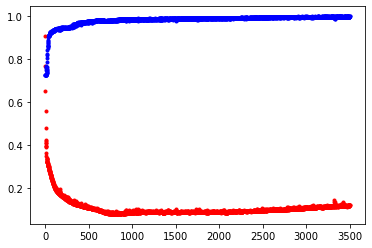

In [52]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)

plt.show()

## 4. 학습의 자동 중단 + 전체 코드

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [64]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [65]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [66]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [67]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:04d}-{val_loss:.4f}.hdf5' # 순서 번호 대신 keyword로 지정할 수 있음

In [69]:
# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

In [70]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

In [71]:
# 모델 실행 및 저장
history =  model.fit(X, Y, validation_split = 0.2, epochs = 3500, batch_size = 500,
                     verbose = 1, callbacks = [checkpointer, early_stopping_callback])

Train on 780 samples, validate on 195 samples
Epoch 1/3500
780/780 [==============================] - 0s 149us/step - loss: 1.2415 - accuracy: 0.7256 - val_loss: 0.7791 - val_accuracy: 0.7744

Epoch 00001: val_loss improved from inf to 0.77907, saving model to ./model/0001-0.7791.hdf5
Epoch 2/3500
780/780 [==============================] - 0s 6us/step - loss: 1.0532 - accuracy: 0.7256 - val_loss: 0.6566 - val_accuracy: 0.7744

Epoch 00002: val_loss improved from 0.77907 to 0.65665, saving model to ./model/0002-0.6566.hdf5
Epoch 3/3500
780/780 [==============================] - 0s 6us/step - loss: 0.8796 - accuracy: 0.7256 - val_loss: 0.5557 - val_accuracy: 0.7744

Epoch 00003: val_loss improved from 0.65665 to 0.55570, saving model to ./model/0003-0.5557.hdf5
Epoch 4/3500
780/780 [==============================] - 0s 8us/step - loss: 0.7424 - accuracy: 0.7256 - val_loss: 0.4743 - val_accuracy: 0.7744

Epoch 00004: val_loss improved from 0.55570 to 0.47428, saving model to ./model/0004-

780/780 [==============================] - 0s 5us/step - loss: 0.3359 - accuracy: 0.8872 - val_loss: 0.2689 - val_accuracy: 0.9026

Epoch 00037: val_loss improved from 0.26937 to 0.26893, saving model to ./model/0037-0.2689.hdf5
Epoch 38/3500
780/780 [==============================] - 0s 5us/step - loss: 0.3343 - accuracy: 0.8923 - val_loss: 0.2679 - val_accuracy: 0.9026

Epoch 00038: val_loss improved from 0.26893 to 0.26787, saving model to ./model/0038-0.2679.hdf5
Epoch 39/3500
780/780 [==============================] - 0s 6us/step - loss: 0.3327 - accuracy: 0.8949 - val_loss: 0.2662 - val_accuracy: 0.9077

Epoch 00039: val_loss improved from 0.26787 to 0.26618, saving model to ./model/0039-0.2662.hdf5
Epoch 40/3500
780/780 [==============================] - 0s 5us/step - loss: 0.3308 - accuracy: 0.9000 - val_loss: 0.2635 - val_accuracy: 0.9077

Epoch 00040: val_loss improved from 0.26618 to 0.26353, saving model to ./model/0040-0.2635.hdf5
Epoch 41/3500
780/780 [===================

780/780 [==============================] - 0s 4us/step - loss: 0.2792 - accuracy: 0.9256 - val_loss: 0.2191 - val_accuracy: 0.9385

Epoch 00071: val_loss improved from 0.22131 to 0.21914, saving model to ./model/0071-0.2191.hdf5
Epoch 72/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2777 - accuracy: 0.9256 - val_loss: 0.2168 - val_accuracy: 0.9436

Epoch 00072: val_loss improved from 0.21914 to 0.21677, saving model to ./model/0072-0.2168.hdf5
Epoch 73/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2764 - accuracy: 0.9256 - val_loss: 0.2146 - val_accuracy: 0.9436

Epoch 00073: val_loss improved from 0.21677 to 0.21464, saving model to ./model/0073-0.2146.hdf5
Epoch 74/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2746 - accuracy: 0.9256 - val_loss: 0.2138 - val_accuracy: 0.9436

Epoch 00074: val_loss improved from 0.21464 to 0.21379, saving model to ./model/0074-0.2138.hdf5
Epoch 75/3500
780/780 [===================

780/780 [==============================] - 0s 5us/step - loss: 0.2366 - accuracy: 0.9359 - val_loss: 0.1768 - val_accuracy: 0.9538

Epoch 00105: val_loss improved from 0.17957 to 0.17684, saving model to ./model/0105-0.1768.hdf5
Epoch 106/3500
780/780 [==============================] - 0s 4us/step - loss: 0.2359 - accuracy: 0.9359 - val_loss: 0.1752 - val_accuracy: 0.9538

Epoch 00106: val_loss improved from 0.17684 to 0.17525, saving model to ./model/0106-0.1752.hdf5
Epoch 107/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2357 - accuracy: 0.9346 - val_loss: 0.1746 - val_accuracy: 0.9538

Epoch 00107: val_loss improved from 0.17525 to 0.17460, saving model to ./model/0107-0.1746.hdf5
Epoch 108/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2341 - accuracy: 0.9359 - val_loss: 0.1771 - val_accuracy: 0.9487

Epoch 00108: val_loss did not improve from 0.17460
Epoch 109/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2329 

780/780 [==============================] - 0s 5us/step - loss: 0.2116 - accuracy: 0.9397 - val_loss: 0.1568 - val_accuracy: 0.9538

Epoch 00142: val_loss improved from 0.15825 to 0.15684, saving model to ./model/0142-0.1568.hdf5
Epoch 143/3500
780/780 [==============================] - 0s 4us/step - loss: 0.2111 - accuracy: 0.9385 - val_loss: 0.1586 - val_accuracy: 0.9590

Epoch 00143: val_loss did not improve from 0.15684
Epoch 144/3500
780/780 [==============================] - 0s 4us/step - loss: 0.2102 - accuracy: 0.9397 - val_loss: 0.1586 - val_accuracy: 0.9590

Epoch 00144: val_loss did not improve from 0.15684
Epoch 145/3500
780/780 [==============================] - 0s 5us/step - loss: 0.2094 - accuracy: 0.9423 - val_loss: 0.1602 - val_accuracy: 0.9590

Epoch 00145: val_loss did not improve from 0.15684
Epoch 146/3500
780/780 [==============================] - 0s 4us/step - loss: 0.2092 - accuracy: 0.9423 - val_loss: 0.1598 - val_accuracy: 0.9590

Epoch 00146: val_loss did not 

780/780 [==============================] - 0s 5us/step - loss: 0.1927 - accuracy: 0.9449 - val_loss: 0.1563 - val_accuracy: 0.9538

Epoch 00181: val_loss did not improve from 0.14126
Epoch 182/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1932 - accuracy: 0.9449 - val_loss: 0.1504 - val_accuracy: 0.9590

Epoch 00182: val_loss did not improve from 0.14126
Epoch 183/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1908 - accuracy: 0.9449 - val_loss: 0.1434 - val_accuracy: 0.9590

Epoch 00183: val_loss did not improve from 0.14126
Epoch 184/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1907 - accuracy: 0.9423 - val_loss: 0.1411 - val_accuracy: 0.9590

Epoch 00184: val_loss improved from 0.14126 to 0.14114, saving model to ./model/0184-0.1411.hdf5
Epoch 185/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1912 - accuracy: 0.9410 - val_loss: 0.1423 - val_accuracy: 0.9590

Epoch 00185: val_loss did not 


Epoch 00220: val_loss did not improve from 0.13330
Epoch 221/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1739 - accuracy: 0.9462 - val_loss: 0.1345 - val_accuracy: 0.9590

Epoch 00221: val_loss did not improve from 0.13330
Epoch 222/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1735 - accuracy: 0.9462 - val_loss: 0.1336 - val_accuracy: 0.9590

Epoch 00222: val_loss did not improve from 0.13330
Epoch 223/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1738 - accuracy: 0.9462 - val_loss: 0.1340 - val_accuracy: 0.9590

Epoch 00223: val_loss did not improve from 0.13330
Epoch 224/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1732 - accuracy: 0.9462 - val_loss: 0.1378 - val_accuracy: 0.9590

Epoch 00224: val_loss did not improve from 0.13330
Epoch 225/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1731 - accuracy: 0.9462 - val_loss: 0.1357 - val_accuracy: 0.9590

Epoch 002

780/780 [==============================] - 0s 5us/step - loss: 0.1595 - accuracy: 0.9474 - val_loss: 0.1258 - val_accuracy: 0.9641

Epoch 00259: val_loss did not improve from 0.12301
Epoch 260/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1590 - accuracy: 0.9487 - val_loss: 0.1283 - val_accuracy: 0.9641

Epoch 00260: val_loss did not improve from 0.12301
Epoch 261/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1591 - accuracy: 0.9500 - val_loss: 0.1265 - val_accuracy: 0.9641

Epoch 00261: val_loss did not improve from 0.12301
Epoch 262/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1583 - accuracy: 0.9487 - val_loss: 0.1231 - val_accuracy: 0.9641

Epoch 00262: val_loss did not improve from 0.12301
Epoch 263/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1578 - accuracy: 0.9474 - val_loss: 0.1206 - val_accuracy: 0.9692

Epoch 00263: val_loss improved from 0.12301 to 0.12056, saving model to ./mo

780/780 [==============================] - 0s 6us/step - loss: 0.1428 - accuracy: 0.9603 - val_loss: 0.1171 - val_accuracy: 0.9692

Epoch 00299: val_loss did not improve from 0.11560
Epoch 300/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1426 - accuracy: 0.9538 - val_loss: 0.1147 - val_accuracy: 0.9692

Epoch 00300: val_loss improved from 0.11560 to 0.11472, saving model to ./model/0300-0.1147.hdf5
Epoch 301/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1415 - accuracy: 0.9564 - val_loss: 0.1181 - val_accuracy: 0.9641

Epoch 00301: val_loss did not improve from 0.11472
Epoch 302/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1422 - accuracy: 0.9590 - val_loss: 0.1197 - val_accuracy: 0.9692

Epoch 00302: val_loss did not improve from 0.11472
Epoch 303/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1408 - accuracy: 0.9615 - val_loss: 0.1136 - val_accuracy: 0.9692

Epoch 00303: val_loss improved

780/780 [==============================] - 0s 5us/step - loss: 0.1301 - accuracy: 0.9679 - val_loss: 0.1096 - val_accuracy: 0.9692

Epoch 00338: val_loss did not improve from 0.10744
Epoch 339/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1293 - accuracy: 0.9654 - val_loss: 0.1067 - val_accuracy: 0.9641

Epoch 00339: val_loss improved from 0.10744 to 0.10669, saving model to ./model/0339-0.1067.hdf5
Epoch 340/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1304 - accuracy: 0.9628 - val_loss: 0.1086 - val_accuracy: 0.9641

Epoch 00340: val_loss did not improve from 0.10669
Epoch 341/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.1155 - val_accuracy: 0.9744

Epoch 00341: val_loss did not improve from 0.10669
Epoch 342/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1303 - accuracy: 0.9679 - val_loss: 0.1077 - val_accuracy: 0.9641

Epoch 00342: val_loss did not 


Epoch 00377: val_loss did not improve from 0.10002
Epoch 378/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1201 - accuracy: 0.9692 - val_loss: 0.1014 - val_accuracy: 0.9692

Epoch 00378: val_loss did not improve from 0.10002
Epoch 379/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1211 - accuracy: 0.9667 - val_loss: 0.1002 - val_accuracy: 0.9692

Epoch 00379: val_loss did not improve from 0.10002
Epoch 380/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1201 - accuracy: 0.9667 - val_loss: 0.1050 - val_accuracy: 0.9692

Epoch 00380: val_loss did not improve from 0.10002
Epoch 381/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1200 - accuracy: 0.9692 - val_loss: 0.1059 - val_accuracy: 0.9692

Epoch 00381: val_loss did not improve from 0.10002
Epoch 382/3500
780/780 [==============================] - 0s 6us/step - loss: 0.1197 - accuracy: 0.9679 - val_loss: 0.1007 - val_accuracy: 0.9692

Epoch 003

780/780 [==============================] - 0s 4us/step - loss: 0.1120 - accuracy: 0.9731 - val_loss: 0.0968 - val_accuracy: 0.9692

Epoch 00418: val_loss did not improve from 0.09620
Epoch 419/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1120 - accuracy: 0.9692 - val_loss: 0.0952 - val_accuracy: 0.9692

Epoch 00419: val_loss improved from 0.09620 to 0.09518, saving model to ./model/0419-0.0952.hdf5
Epoch 420/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1127 - accuracy: 0.9692 - val_loss: 0.0988 - val_accuracy: 0.9744

Epoch 00420: val_loss did not improve from 0.09518
Epoch 421/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1134 - accuracy: 0.9744 - val_loss: 0.1055 - val_accuracy: 0.9744

Epoch 00421: val_loss did not improve from 0.09518
Epoch 422/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1142 - accuracy: 0.9731 - val_loss: 0.0964 - val_accuracy: 0.9692

Epoch 00422: val_loss did not 

780/780 [==============================] - 0s 5us/step - loss: 0.1047 - accuracy: 0.9731 - val_loss: 0.0935 - val_accuracy: 0.9744

Epoch 00458: val_loss did not improve from 0.09313
Epoch 459/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1045 - accuracy: 0.9744 - val_loss: 0.0954 - val_accuracy: 0.9744

Epoch 00459: val_loss did not improve from 0.09313
Epoch 460/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1043 - accuracy: 0.9744 - val_loss: 0.0940 - val_accuracy: 0.9744

Epoch 00460: val_loss did not improve from 0.09313
Epoch 461/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1038 - accuracy: 0.9744 - val_loss: 0.0931 - val_accuracy: 0.9744

Epoch 00461: val_loss improved from 0.09313 to 0.09310, saving model to ./model/0461-0.0931.hdf5
Epoch 462/3500
780/780 [==============================] - 0s 4us/step - loss: 0.1040 - accuracy: 0.9731 - val_loss: 0.0934 - val_accuracy: 0.9744

Epoch 00462: val_loss did not 


Epoch 00497: val_loss improved from 0.08862 to 0.08776, saving model to ./model/0497-0.0878.hdf5
Epoch 498/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0991 - accuracy: 0.9756 - val_loss: 0.0920 - val_accuracy: 0.9744

Epoch 00498: val_loss did not improve from 0.08776
Epoch 499/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0992 - accuracy: 0.9756 - val_loss: 0.0990 - val_accuracy: 0.9744

Epoch 00499: val_loss did not improve from 0.08776
Epoch 500/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0999 - accuracy: 0.9756 - val_loss: 0.0884 - val_accuracy: 0.9795

Epoch 00500: val_loss did not improve from 0.08776
Epoch 501/3500
780/780 [==============================] - 0s 5us/step - loss: 0.1000 - accuracy: 0.9744 - val_loss: 0.0867 - val_accuracy: 0.9795

Epoch 00501: val_loss improved from 0.08776 to 0.08665, saving model to ./model/0501-0.0867.hdf5
Epoch 502/3500
780/780 [==============================] - 0s 4us


Epoch 00537: val_loss did not improve from 0.08591
Epoch 538/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0924 - accuracy: 0.9769 - val_loss: 0.0897 - val_accuracy: 0.9795

Epoch 00538: val_loss did not improve from 0.08591
Epoch 539/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0923 - accuracy: 0.9769 - val_loss: 0.0885 - val_accuracy: 0.9846

Epoch 00539: val_loss did not improve from 0.08591
Epoch 540/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0917 - accuracy: 0.9769 - val_loss: 0.0862 - val_accuracy: 0.9846

Epoch 00540: val_loss did not improve from 0.08591
Epoch 541/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0922 - accuracy: 0.9756 - val_loss: 0.0857 - val_accuracy: 0.9846

Epoch 00541: val_loss improved from 0.08591 to 0.08570, saving model to ./model/0541-0.0857.hdf5
Epoch 542/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0917 - accuracy: 0.9756 - val_


Epoch 00577: val_loss did not improve from 0.08241
Epoch 578/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0866 - accuracy: 0.9769 - val_loss: 0.0843 - val_accuracy: 0.9846

Epoch 00578: val_loss did not improve from 0.08241
Epoch 579/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0863 - accuracy: 0.9769 - val_loss: 0.0849 - val_accuracy: 0.9846

Epoch 00579: val_loss did not improve from 0.08241
Epoch 580/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0862 - accuracy: 0.9782 - val_loss: 0.0851 - val_accuracy: 0.9846

Epoch 00580: val_loss did not improve from 0.08241
Epoch 581/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0865 - accuracy: 0.9769 - val_loss: 0.0846 - val_accuracy: 0.9846

Epoch 00581: val_loss did not improve from 0.08241
Epoch 582/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0858 - accuracy: 0.9769 - val_loss: 0.0877 - val_accuracy: 0.9795

Epoch 005

780/780 [==============================] - 0s 4us/step - loss: 0.0813 - accuracy: 0.9795 - val_loss: 0.0857 - val_accuracy: 0.9795

Epoch 00618: val_loss did not improve from 0.07957
Epoch 619/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0817 - accuracy: 0.9795 - val_loss: 0.0851 - val_accuracy: 0.9795

Epoch 00619: val_loss did not improve from 0.07957
Epoch 620/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0814 - accuracy: 0.9795 - val_loss: 0.0804 - val_accuracy: 0.9846

Epoch 00620: val_loss did not improve from 0.07957
Epoch 621/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0808 - accuracy: 0.9782 - val_loss: 0.0812 - val_accuracy: 0.9846

Epoch 00621: val_loss did not improve from 0.07957
Epoch 622/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0803 - accuracy: 0.9782 - val_loss: 0.0843 - val_accuracy: 0.9795

Epoch 00622: val_loss did not improve from 0.07957
Epoch 623/3500
780/780 [=

780/780 [==============================] - 0s 5us/step - loss: 0.0755 - accuracy: 0.9795 - val_loss: 0.0838 - val_accuracy: 0.9795

Epoch 00659: val_loss did not improve from 0.07857
Epoch 660/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0759 - accuracy: 0.9782 - val_loss: 0.0834 - val_accuracy: 0.9795

Epoch 00660: val_loss did not improve from 0.07857
Epoch 661/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0757 - accuracy: 0.9782 - val_loss: 0.0801 - val_accuracy: 0.9795

Epoch 00661: val_loss did not improve from 0.07857
Epoch 662/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0755 - accuracy: 0.9782 - val_loss: 0.0792 - val_accuracy: 0.9795

Epoch 00662: val_loss did not improve from 0.07857
Epoch 663/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0754 - accuracy: 0.9795 - val_loss: 0.0816 - val_accuracy: 0.9795

Epoch 00663: val_loss did not improve from 0.07857
Epoch 664/3500
780/780 [=

Epoch 700/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0721 - accuracy: 0.9795 - val_loss: 0.0759 - val_accuracy: 0.9744

Epoch 00700: val_loss improved from 0.07623 to 0.07586, saving model to ./model/0700-0.0759.hdf5
Epoch 701/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0717 - accuracy: 0.9808 - val_loss: 0.0809 - val_accuracy: 0.9795

Epoch 00701: val_loss did not improve from 0.07586
Epoch 702/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0705 - accuracy: 0.9821 - val_loss: 0.0837 - val_accuracy: 0.9795

Epoch 00702: val_loss did not improve from 0.07586
Epoch 703/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0722 - accuracy: 0.9821 - val_loss: 0.0794 - val_accuracy: 0.9795

Epoch 00703: val_loss did not improve from 0.07586
Epoch 704/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0704 - accuracy: 0.9821 - val_loss: 0.0779 - val_accuracy: 0.9795

Epoch 00704: va

780/780 [==============================] - 0s 5us/step - loss: 0.0685 - accuracy: 0.9821 - val_loss: 0.0768 - val_accuracy: 0.9744

Epoch 00740: val_loss did not improve from 0.07281
Epoch 741/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0688 - accuracy: 0.9808 - val_loss: 0.0866 - val_accuracy: 0.9692

Epoch 00741: val_loss did not improve from 0.07281
Epoch 742/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0702 - accuracy: 0.9808 - val_loss: 0.0725 - val_accuracy: 0.9744

Epoch 00742: val_loss improved from 0.07281 to 0.07248, saving model to ./model/0742-0.0725.hdf5
Epoch 743/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0683 - accuracy: 0.9821 - val_loss: 0.0718 - val_accuracy: 0.9795

Epoch 00743: val_loss improved from 0.07248 to 0.07182, saving model to ./model/0743-0.0718.hdf5
Epoch 744/3500
780/780 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.98 - 0s 4us/step - loss: 0.0713 - ac

780/780 [==============================] - 0s 5us/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0728 - val_accuracy: 0.9744

Epoch 00780: val_loss did not improve from 0.07092
Epoch 781/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0627 - accuracy: 0.9821 - val_loss: 0.0712 - val_accuracy: 0.9744

Epoch 00781: val_loss did not improve from 0.07092
Epoch 782/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0726 - val_accuracy: 0.9744

Epoch 00782: val_loss did not improve from 0.07092
Epoch 783/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0758 - val_accuracy: 0.9744

Epoch 00783: val_loss did not improve from 0.07092
Epoch 784/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0743 - val_accuracy: 0.9744

Epoch 00784: val_loss did not improve from 0.07092
Epoch 785/3500
780/780 [=


Epoch 00820: val_loss did not improve from 0.07002
Epoch 821/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0611 - accuracy: 0.9821 - val_loss: 0.0745 - val_accuracy: 0.9744

Epoch 00821: val_loss did not improve from 0.07002
Epoch 822/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0627 - accuracy: 0.9795 - val_loss: 0.0692 - val_accuracy: 0.9744

Epoch 00822: val_loss improved from 0.07002 to 0.06922, saving model to ./model/0822-0.0692.hdf5
Epoch 823/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0601 - accuracy: 0.9846 - val_loss: 0.0708 - val_accuracy: 0.9744

Epoch 00823: val_loss did not improve from 0.06922
Epoch 824/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0747 - val_accuracy: 0.9744

Epoch 00824: val_loss did not improve from 0.06922
Epoch 825/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0602 - accuracy: 0.9808 - val_

780/780 [==============================] - 0s 5us/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00861: val_loss did not improve from 0.06761
Epoch 862/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0570 - accuracy: 0.9846 - val_loss: 0.0691 - val_accuracy: 0.9744

Epoch 00862: val_loss did not improve from 0.06761
Epoch 863/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0568 - accuracy: 0.9846 - val_loss: 0.0710 - val_accuracy: 0.9744

Epoch 00863: val_loss did not improve from 0.06761
Epoch 864/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0565 - accuracy: 0.9846 - val_loss: 0.0738 - val_accuracy: 0.9744

Epoch 00864: val_loss did not improve from 0.06761
Epoch 865/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0712 - val_accuracy: 0.9744

Epoch 00865: val_loss did not improve from 0.06761
Epoch 866/3500
780/780 [=

780/780 [==============================] - 0s 4us/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 0.0701 - val_accuracy: 0.9744

Epoch 00902: val_loss did not improve from 0.06631
Epoch 903/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0561 - accuracy: 0.9846 - val_loss: 0.0674 - val_accuracy: 0.9744

Epoch 00903: val_loss did not improve from 0.06631
Epoch 904/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0703 - val_accuracy: 0.9744

Epoch 00904: val_loss did not improve from 0.06631
Epoch 905/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0550 - accuracy: 0.9846 - val_loss: 0.0725 - val_accuracy: 0.9744

Epoch 00905: val_loss did not improve from 0.06631
Epoch 906/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0551 - accuracy: 0.9821 - val_loss: 0.0672 - val_accuracy: 0.9744

Epoch 00906: val_loss did not improve from 0.06631
Epoch 907/3500
780/780 [=

780/780 [==============================] - 0s 5us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0660 - val_accuracy: 0.9795

Epoch 00943: val_loss improved from 0.06631 to 0.06604, saving model to ./model/0943-0.0660.hdf5
Epoch 944/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0669 - val_accuracy: 0.9744

Epoch 00944: val_loss did not improve from 0.06604
Epoch 945/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0553 - accuracy: 0.9821 - val_loss: 0.0737 - val_accuracy: 0.9744

Epoch 00945: val_loss did not improve from 0.06604
Epoch 946/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0678 - val_accuracy: 0.9744

Epoch 00946: val_loss did not improve from 0.06604
Epoch 947/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0667 - val_accuracy: 0.9744

Epoch 00947: val_loss did not 


Epoch 00983: val_loss did not improve from 0.06463
Epoch 984/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9744

Epoch 00984: val_loss did not improve from 0.06463
Epoch 985/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.0657 - val_accuracy: 0.9744

Epoch 00985: val_loss did not improve from 0.06463
Epoch 986/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0653 - val_accuracy: 0.9744

Epoch 00986: val_loss did not improve from 0.06463
Epoch 987/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0684 - val_accuracy: 0.9744

Epoch 00987: val_loss did not improve from 0.06463
Epoch 988/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0713 - val_accuracy: 0.9744

Epoch 009

780/780 [==============================] - 0s 5us/step - loss: 0.0469 - accuracy: 0.9872 - val_loss: 0.0636 - val_accuracy: 0.9744

Epoch 01024: val_loss did not improve from 0.06246
Epoch 1025/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0639 - val_accuracy: 0.9744

Epoch 01025: val_loss did not improve from 0.06246
Epoch 1026/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0712 - val_accuracy: 0.9744

Epoch 01026: val_loss did not improve from 0.06246
Epoch 1027/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0721 - val_accuracy: 0.9744

Epoch 01027: val_loss did not improve from 0.06246
Epoch 1028/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0515 - accuracy: 0.9821 - val_loss: 0.0652 - val_accuracy: 0.9744

Epoch 01028: val_loss did not improve from 0.06246
Epoch 1029/3500
780/7

Epoch 1065/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0466 - accuracy: 0.9846 - val_loss: 0.0648 - val_accuracy: 0.9744

Epoch 01065: val_loss did not improve from 0.06143
Epoch 1066/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0462 - accuracy: 0.9846 - val_loss: 0.0687 - val_accuracy: 0.9744

Epoch 01066: val_loss did not improve from 0.06143
Epoch 1067/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0471 - accuracy: 0.9846 - val_loss: 0.0640 - val_accuracy: 0.9744

Epoch 01067: val_loss did not improve from 0.06143
Epoch 1068/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0628 - val_accuracy: 0.9744

Epoch 01068: val_loss did not improve from 0.06143
Epoch 1069/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9744

Epoch 01069: val_loss did not improve from 0.06143
Epoch

780/780 [==============================] - 0s 5us/step - loss: 0.0445 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9744

Epoch 01105: val_loss did not improve from 0.06035
Epoch 1106/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0661 - val_accuracy: 0.9795

Epoch 01106: val_loss did not improve from 0.06035
Epoch 1107/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9744

Epoch 01107: val_loss did not improve from 0.06035
Epoch 1108/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0613 - val_accuracy: 0.9744

Epoch 01108: val_loss did not improve from 0.06035
Epoch 1109/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0643 - val_accuracy: 0.9744

Epoch 01109: val_loss did not improve from 0.06035
Epoch 1110/3500
780/7


Epoch 01145: val_loss did not improve from 0.05982
Epoch 1146/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0620 - val_accuracy: 0.9744

Epoch 01146: val_loss did not improve from 0.05982
Epoch 1147/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0620 - val_accuracy: 0.9744

Epoch 01147: val_loss did not improve from 0.05982
Epoch 1148/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0628 - val_accuracy: 0.9744

Epoch 01148: val_loss did not improve from 0.05982
Epoch 1149/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0611 - val_accuracy: 0.9744

Epoch 01149: val_loss did not improve from 0.05982
Epoch 1150/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0605 - val_accuracy: 0.9744

Epoc

780/780 [==============================] - 0s 4us/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.0585 - val_accuracy: 0.9795

Epoch 01186: val_loss improved from 0.05928 to 0.05845, saving model to ./model/1186-0.0585.hdf5
Epoch 1187/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.0602 - val_accuracy: 0.9744

Epoch 01187: val_loss did not improve from 0.05845
Epoch 1188/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0681 - val_accuracy: 0.9795

Epoch 01188: val_loss did not improve from 0.05845
Epoch 1189/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.0627 - val_accuracy: 0.9795

Epoch 01189: val_loss did not improve from 0.05845
Epoch 1190/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0593 - val_accuracy: 0.9795

Epoch 01190: val_loss did 

780/780 [==============================] - 0s 5us/step - loss: 0.0382 - accuracy: 0.9859 - val_loss: 0.0599 - val_accuracy: 0.9744

Epoch 01227: val_loss did not improve from 0.05845
Epoch 1228/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9744

Epoch 01228: val_loss did not improve from 0.05845
Epoch 1229/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01229: val_loss did not improve from 0.05845
Epoch 1230/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0382 - accuracy: 0.9859 - val_loss: 0.0616 - val_accuracy: 0.9795

Epoch 01230: val_loss did not improve from 0.05845
Epoch 1231/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0614 - val_accuracy: 0.9795

Epoch 01231: val_loss did not improve from 0.05845
Epoch 1232/3500
780/7

780/780 [==============================] - 0s 6us/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9795

Epoch 01268: val_loss did not improve from 0.05647
Epoch 1269/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0373 - accuracy: 0.9872 - val_loss: 0.0621 - val_accuracy: 0.9795

Epoch 01269: val_loss did not improve from 0.05647
Epoch 1270/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0374 - accuracy: 0.9859 - val_loss: 0.0583 - val_accuracy: 0.9795

Epoch 01270: val_loss did not improve from 0.05647
Epoch 1271/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0564 - val_accuracy: 0.9795

Epoch 01271: val_loss improved from 0.05647 to 0.05642, saving model to ./model/1271-0.0564.hdf5
Epoch 1272/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0379 - accuracy: 0.9859 - val_loss: 0.0566 - val_accuracy: 0.9795

Epoch 01272: val_loss did 

780/780 [==============================] - 0s 5us/step - loss: 0.0357 - accuracy: 0.9859 - val_loss: 0.0649 - val_accuracy: 0.9795

Epoch 01309: val_loss did not improve from 0.05642
Epoch 1310/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0362 - accuracy: 0.9872 - val_loss: 0.0605 - val_accuracy: 0.9795

Epoch 01310: val_loss did not improve from 0.05642
Epoch 1311/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0578 - val_accuracy: 0.9795

Epoch 01311: val_loss did not improve from 0.05642
Epoch 1312/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9795

Epoch 01312: val_loss did not improve from 0.05642
Epoch 1313/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0354 - accuracy: 0.9846 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01313: val_loss did not improve from 0.05642
Epoch 1314/3500
780/7

780/780 [==============================] - 0s 5us/step - loss: 0.0354 - accuracy: 0.9859 - val_loss: 0.0579 - val_accuracy: 0.9795

Epoch 01350: val_loss did not improve from 0.05628
Epoch 1351/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0597 - val_accuracy: 0.9795

Epoch 01351: val_loss did not improve from 0.05628
Epoch 1352/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0348 - accuracy: 0.9872 - val_loss: 0.0672 - val_accuracy: 0.9795

Epoch 01352: val_loss did not improve from 0.05628
Epoch 1353/3500
780/780 [==============================] - 0s 4us/step - loss: 0.0365 - accuracy: 0.9859 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01353: val_loss did not improve from 0.05628
Epoch 1354/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0335 - accuracy: 0.9885 - val_loss: 0.0571 - val_accuracy: 0.9846

Epoch 01354: val_loss did not improve from 0.05628
Epoch 1355/3500
780/7

780/780 [==============================] - 0s 5us/step - loss: 0.0334 - accuracy: 0.9885 - val_loss: 0.0603 - val_accuracy: 0.9795

Epoch 01391: val_loss did not improve from 0.05628
Epoch 1392/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0332 - accuracy: 0.9885 - val_loss: 0.0630 - val_accuracy: 0.9795

Epoch 01392: val_loss did not improve from 0.05628
Epoch 1393/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0334 - accuracy: 0.9872 - val_loss: 0.0592 - val_accuracy: 0.9795

Epoch 01393: val_loss did not improve from 0.05628
Epoch 1394/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0573 - val_accuracy: 0.9795

Epoch 01394: val_loss did not improve from 0.05628
Epoch 1395/3500
780/780 [==============================] - 0s 6us/step - loss: 0.0332 - accuracy: 0.9885 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01395: val_loss did not improve from 0.05628
Epoch 1396/3500
780/7

780/780 [==============================] - 0s 5us/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0644 - val_accuracy: 0.9795

Epoch 01432: val_loss did not improve from 0.05522
Epoch 1433/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.0553 - val_accuracy: 0.9795

Epoch 01433: val_loss did not improve from 0.05522
Epoch 1434/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0372 - accuracy: 0.9859 - val_loss: 0.0561 - val_accuracy: 0.9795

Epoch 01434: val_loss did not improve from 0.05522
Epoch 1435/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0637 - val_accuracy: 0.9795

Epoch 01435: val_loss did not improve from 0.05522
Epoch 1436/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0334 - accuracy: 0.9859 - val_loss: 0.0689 - val_accuracy: 0.9795

Epoch 01436: val_loss did not improve from 0.05522
Epoch 1437/3500
780/7

780/780 [==============================] - 0s 5us/step - loss: 0.0303 - accuracy: 0.9897 - val_loss: 0.0624 - val_accuracy: 0.9795

Epoch 01473: val_loss did not improve from 0.05522
Epoch 1474/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0313 - accuracy: 0.9859 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01474: val_loss did not improve from 0.05522
Epoch 1475/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0306 - accuracy: 0.9859 - val_loss: 0.0577 - val_accuracy: 0.9795

Epoch 01475: val_loss did not improve from 0.05522
Epoch 1476/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0312 - accuracy: 0.9885 - val_loss: 0.0576 - val_accuracy: 0.9795

Epoch 01476: val_loss did not improve from 0.05522
Epoch 1477/3500
780/780 [==============================] - 0s 5us/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0611 - val_accuracy: 0.9795

Epoch 01477: val_loss did not improve from 0.05522
Epoch 1478/3500
780/7

In [72]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss  = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

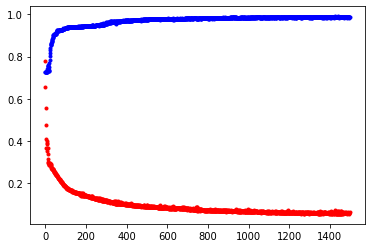

In [73]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)

plt.show()